In [ ]:
import Pkg; Pkg.add("SparseArrays")

In [1]:
using PyPlot, LinearAlgebra, SparseArrays

In [4]:
function bvp1(n)
    # Solve u''(x) = f(x), u(0) = u(1) = 0
    f(x) = exp(-x)
    uexact(x) = exp(-x) + (1 - exp(-1))*x - 1
    
    h = 1 / (n+1)
    x = h * (1:n)
    mkfull(x,u) = [0;x;1], [0;u;0]

    A = SymTridiagonal(-2*ones(n), ones(n-1)) / h^2
    rhs = f.(x)
    u = A \ rhs

    clf()
    plot(mkfull(x,u)..., "-o")

    maxerror = maximum(@. abs(u - uexact(x)))
end

bvp1 (generic function with 1 method)

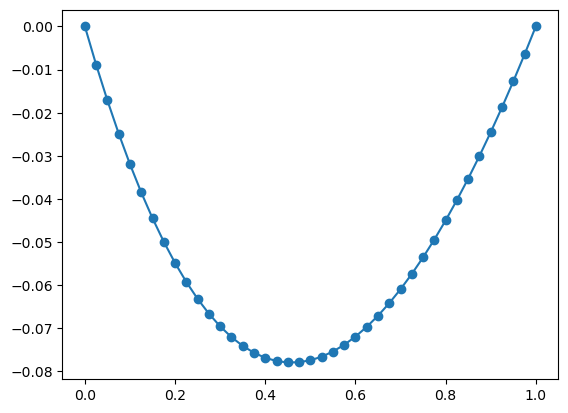

In [6]:
bvp1(39)
gcf()

In [ ]:
function bvp2(n)
    # Solve u''(x) = f(x), u'(0) = 0, u(1) = 0
    f(x) = exp(-x)
    uexact(x) = exp(-x) + x - exp(-1) - 1
    
    h = 1 / (n+1)
    x = h * (0:n+1)

    A = SymTridiagonal(-2*ones(n+2), ones(n+1)) / h^2
    rhs = f.(x)
    
    A = sparse(A)
    # Neumann at left
    A[1,1:3] = [-1.5, 2, -0.5]
    rhs[1] = 0
    # Dirichet at right
    A[end,:] .= 0
    A[end,end] = 1
    rhs[end] = 0
    
    u = A \ rhs

    clf()
    plot(x, u, "-o")

    maxerror = maximum(@. abs(u - uexact(x)))
end

In [ ]:
bvp2(39)